In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.ensemble import RandomForestRegressor

# Read in files

# Model 4.1 - Random Forest Regressor (most optimal) - "Words, Business Category, Review Count, Sentiment, review_votes"

In [3]:
revs = pd.read_csv("../all_full_reviews.csv").drop(["Unnamed: 0"],axis=1)


In [4]:
revs.categories = revs.categories.str.replace(" ","")
revs.categories
revs["service"] = revs.categories.fillna("").str.split(",")

In [5]:
%matplotlib inline
from sklearn.preprocessing import MultiLabelBinarizer

binarizer = MultiLabelBinarizer()
services = pd.DataFrame(
    binarizer.fit_transform(revs["service"]),
    columns=binarizer.classes_
)
services = services.drop([""],axis=1)


In [6]:
x = revs.drop(["categories","words","text", "rating","neu","business_id","review_id","service"],axis=1)

In [7]:
print(x.columns)

Index(['neg', 'pos', 'votes.cool', 'votes.funny', 'votes.useful',
       'review_count', 'rest_rating'],
      dtype='object')


In [8]:
#x_tr = pd.get_dummies(x)
y_tr = revs["rating"]

In [9]:
## make dummy for words
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(x)
x_tr = scaler.transform(x)

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
# for train data - get id-idf sparse matrix 
vec = TfidfVectorizer(norm=None, max_df= .70, max_features=300) # Do not normalize.
revs.words = revs.words.fillna("")
vec.fit(revs.words) # This determines the vocabulary.
tf_idf_sparse_tr = vec.transform(revs.words)
tf_idf_sparse_tr

<10000x300 sparse matrix of type '<class 'numpy.float64'>'
	with 236128 stored elements in Compressed Sparse Row format>

In [11]:
x_tr = pd.DataFrame(x_tr).rename(index=int, columns={0: 'neg',1: 'pos',2:'votes.cool',3: 'votes.funny',4: 'votes.useful',
       5: 'review_count', 6:'rest_rating'})

In [12]:
x_tr_s = pd.concat([x_tr, services,pd.DataFrame(tf_idf_sparse_tr.todense())],axis=1)


In [13]:
# Use numpy to convert to arrays
import numpy as np
# Labels are the values we want to predict
labels = np.array(y_tr)

# Saving feature names for later use
feature_list = list(pd.DataFrame(x_tr_s).columns)
# Convert to numpy array
features = np.array(x_tr_s)

In [14]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

model = RandomForestRegressor(n_estimators = 967, min_samples_split= 5,min_samples_leaf= 2,
                              max_features='sqrt',max_depth=90,bootstrap=True)
model.fit(train_features, train_labels);


In [16]:
# Get numerical feature importances
importances = list(model.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

In [26]:
top15feat = feature_importances[:15]
top15imp = sorted(importances,reverse=True)[:15]


In [27]:
tfidfwords=[]
for key, value in top15feat:
    if isinstance(key, int):
        tfidfwords.append(key)

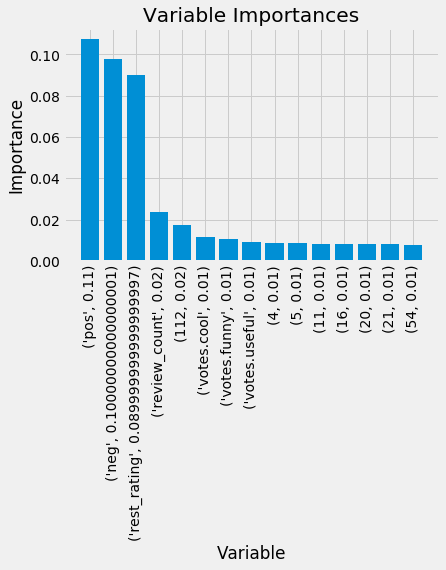

In [28]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(top15feat)))
# Make a bar chart
plt.bar(x_values, top15imp, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, top15feat, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [29]:
tfidf_vocab = {}
for word in vec.vocabulary_:    # for name, age in list.items():  (for Python 3.x)
    if vec.vocabulary_[word] in tfidfwords:
        tfidf_vocab[word] = vec.vocabulary_[word]

In [30]:
tfidf_vocab

{'better': 21,
 'best': 20,
 'amazing': 5,
 'delicious': 54,
 'bad': 16,
 'great': 112,
 'always': 4,
 'asked': 11}

In [31]:
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances[:25]];

Variable: pos                  Importance: 0.11
Variable: neg                  Importance: 0.1
Variable: rest_rating          Importance: 0.09
Variable: review_count         Importance: 0.02
Variable:                  112 Importance: 0.02
Variable: votes.cool           Importance: 0.01
Variable: votes.funny          Importance: 0.01
Variable: votes.useful         Importance: 0.01
Variable:                    4 Importance: 0.01
Variable:                    5 Importance: 0.01
Variable:                   11 Importance: 0.01
Variable:                   16 Importance: 0.01
Variable:                   20 Importance: 0.01
Variable:                   21 Importance: 0.01
Variable:                   54 Importance: 0.01
Variable:                   94 Importance: 0.01
Variable:                  110 Importance: 0.01
Variable:                  139 Importance: 0.01
Variable:                  150 Importance: 0.01
Variable:                  163 Importance: 0.01
Variable:                  174 Importance